In [2]:
#all the packages I intend to use!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('/Users/calvi/Downloads/2025-VeloCityX-Expanded-Fan-Engagement-Data.csv')

In [4]:
df

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8
...,...,...,...,...,...,...,...
95,U096,8,86,6,14,98,22
96,U097,3,82,3,1,159,24
97,U098,1,91,1,9,92,34
98,U099,8,93,0,1,160,40


In [5]:
df['User ID'] = df['User ID'].str.strip('U') #getting rid of the u from the user id

In [6]:
df

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,001,5,80,3,10,120,20
1,002,8,60,1,8,100,35
2,003,3,90,0,6,90,5
3,004,7,70,2,15,140,40
4,005,2,50,5,3,60,8
...,...,...,...,...,...,...,...
95,096,8,86,6,14,98,22
96,097,3,82,3,1,159,24
97,098,1,91,1,9,92,34
98,099,8,93,0,1,160,40


In [7]:
#converting to float instead of int in case it has exact percentage
df['Predictive Accuracy (%)'] = df['Predictive Accuracy (%)'].astype(float) 

In [8]:
#created a new feature that was the sum of time on live 360 chat, msgs and fan challenges done
df['engagement Score'] = df['Time on Live 360 (mins)'] + df['Real-Time Chat Activity (Messages Sent)'] + df['Fan Challenges Completed']

In [9]:
#new stat that takes ad clicks divided by fan challenges completed
df['Ad Interaction Rate'] = df['Sponsorship Interactions (Ad Clicks)'] / df['Fan Challenges Completed']

In [10]:
df

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),engagement Score,Ad Interaction Rate
0,001,5,80.0,3,10,120,20,145,2.000000
1,002,8,60.0,1,8,100,35,143,1.000000
2,003,3,90.0,0,6,90,5,98,2.000000
3,004,7,70.0,2,15,140,40,187,2.142857
4,005,2,50.0,5,3,60,8,70,1.500000
...,...,...,...,...,...,...,...,...,...
95,096,8,86.0,6,14,98,22,128,1.750000
96,097,3,82.0,3,1,159,24,186,0.333333
97,098,1,91.0,1,9,92,34,127,9.000000
98,099,8,93.0,0,1,160,40,208,0.125000


# The distribution below shows us that a majority of people dont buy any merchandise at all but the people who do buy merchandise typically purchase more than 1 item.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


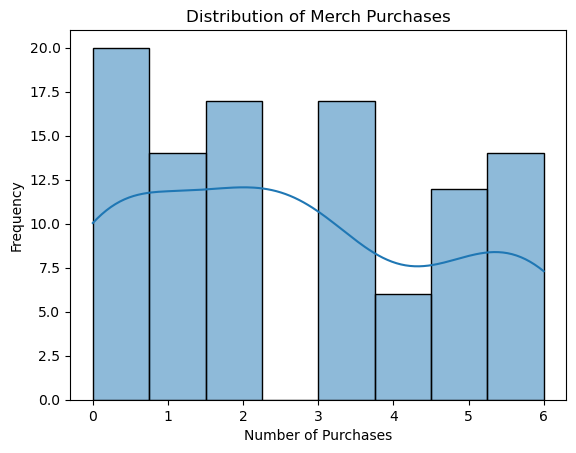

In [11]:
#plot to show how many people buy certain amounts of merchandise
sns.histplot(df['Virtual Merchandise Purchases'], kde=True)
plt.title('Distribution of Merch Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.show()

In [12]:
correlation_matrix = df.corr()

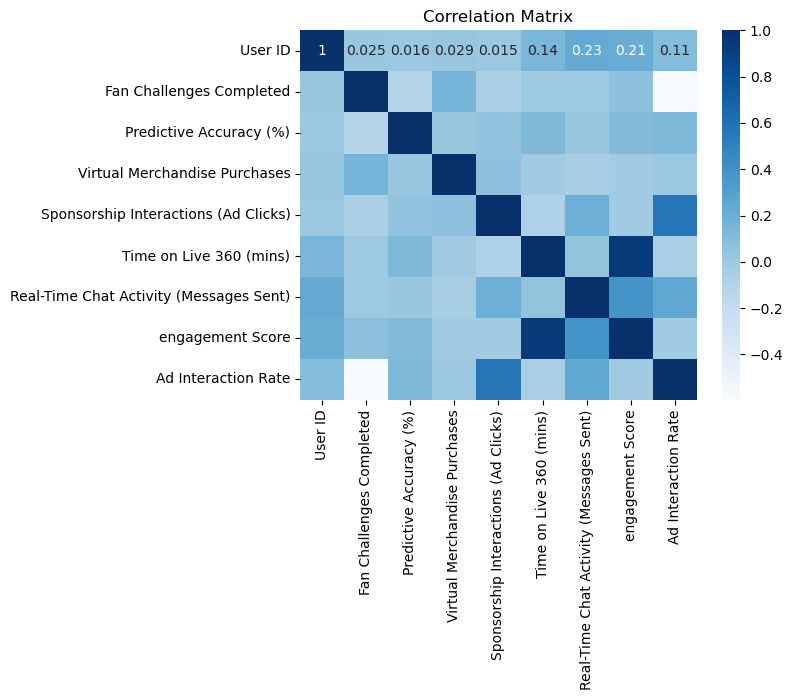

In [13]:
#Correlation Matrix to show which metrics correlate with one another
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [14]:
#i segmented people based on amount of purchases low med high 
df['Purchase_Category'] = pd.cut(df['Virtual Merchandise Purchases'], bins=[0, 1, 5, 10], labels=['Low', 'Medium', 'High'])

In [15]:
#grouped the columns to see how much represented each category i made
print(df.groupby('Purchase_Category').mean(numeric_only=True))

                   Fan Challenges Completed  Predictive Accuracy (%)  \
Purchase_Category                                                      
Low                                5.142857                73.714286   
Medium                             5.884615                73.865385   
High                               6.642857                79.071429   

                   Virtual Merchandise Purchases  \
Purchase_Category                                  
Low                                         1.00   
Medium                                      3.25   
High                                        6.00   

                   Sponsorship Interactions (Ad Clicks)  \
Purchase_Category                                         
Low                                            7.571429   
Medium                                         9.192308   
High                                          10.500000   

                   Time on Live 360 (mins)  \
Purchase_Category                   

/var/folders/8_/_mkv7dtj7hvfvhvj31qsy35h0000gn/T/ipykernel_4128/507493851.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Purchase_Category').mean(numeric_only=True))


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


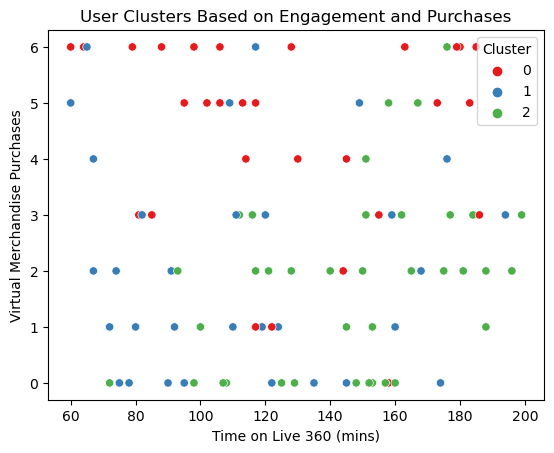

In [16]:
#relevant features for clustering
features = df[['Fan Challenges Completed', 'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)', 
               'Virtual Merchandise Purchases']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#using kmeans clustering to group data points into clusters based on similarities in data
kmeans = KMeans(n_clusters = 3,random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

#just wanted to see the clusters on virtual merchandise purchases and time on 360 
#to see if there were any insights i could get
sns.scatterplot(x=df['Time on Live 360 (mins)'], y=df['Virtual Merchandise Purchases'], hue=df['Cluster'], palette='Set1')
plt.title('User Clusters Based on Engagement and Purchases')
plt.show()

In [17]:
#defining features and target (X,y)
X = df[['Fan Challenges Completed','Predictive Accuracy (%)','Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']]
#used lambda function to determine no purchase or purchase binary value 0 or 1 
y = df['Virtual Merchandise Purchases'].apply(lambda x: 1 if x > 0 else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#creating logistic model since i want to see what features make people actually want to make a purchase
model = LogisticRegression()
model.fit(X_train,y_train)
#predictions
y_pred = model.predict(X_test)
#evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.83      1.00      0.91        25

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# I was curious what features impacted the model the most and found that fan challenges had the most impact on deciding whether someone would buy merchandise

                                   Feature  Coefficient
0                 Fan Challenges Completed     0.067984
2                  Time on Live 360 (mins)     0.005629
1                  Predictive Accuracy (%)    -0.003341
3  Real-Time Chat Activity (Messages Sent)    -0.009730


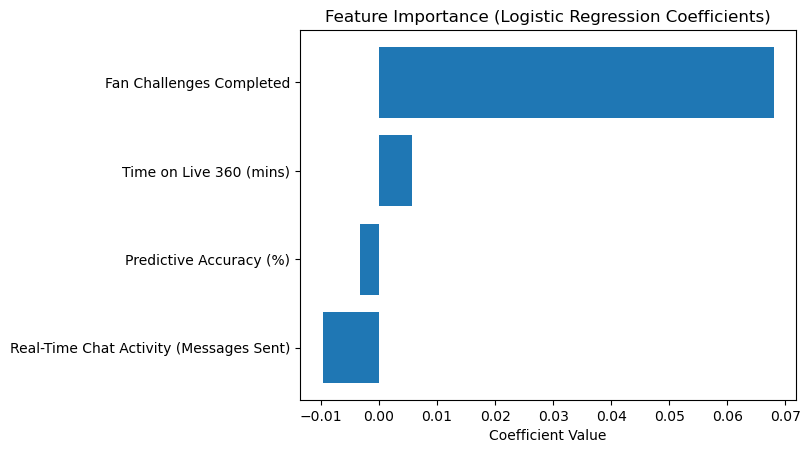

In [22]:
#grab the coefficients 
coefficients = model.coef_[0]

#get the feature names
feature_names = X.columns  

#creating a new df to display coefficients so i dont get it messed up with my current one
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

print(importance_df[['Feature', 'Coefficient']])

#plotting the feature importance 
importance_df = importance_df.sort_values(by='Coefficient')
plt.barh(importance_df['Feature'], importance_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()

Predicted the buyers well but not the nonbuyers probably due to imbalance of dataset

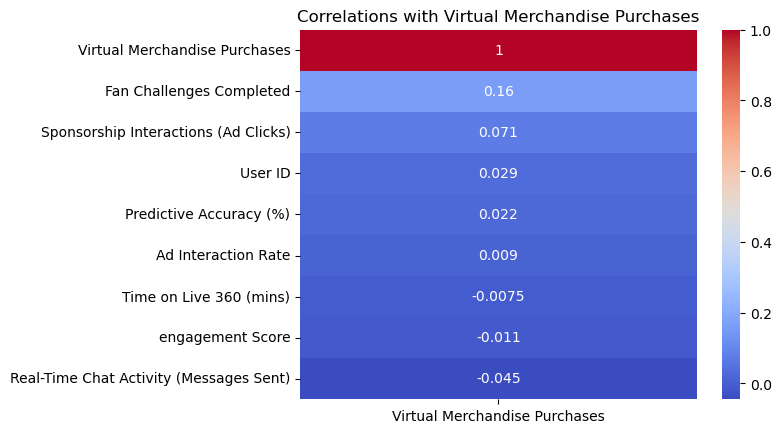

In [47]:
#heatmap of correlations with purchases
sns.heatmap(correlation_matrix[['Virtual Merchandise Purchases']].sort_values(by='Virtual Merchandise Purchases', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlations with Virtual Merchandise Purchases')
plt.show()

We can see that fan challenges completed and ad clicks most correlate to merchandise purchases

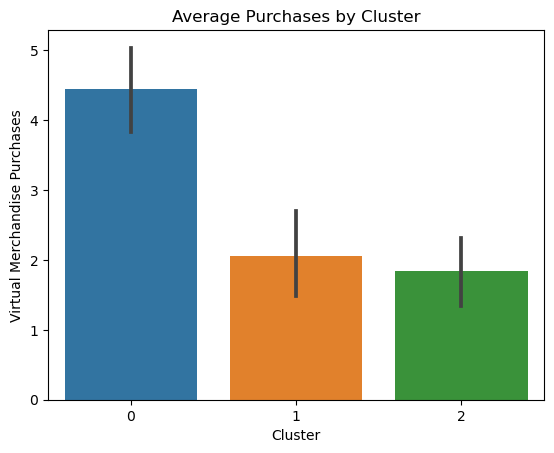

In [48]:
#bar plot of average purchases by cluster
sns.barplot(x='Cluster', y='Virtual Merchandise Purchases', data=df, estimator='mean')
plt.title('Average Purchases by Cluster')
plt.show()

Key takeaways and Insights:
1. From what I gathered Fan challenges seem to impact merchandise sales the most which shows that they either a. get the fans engaged in racing and helps encourage buy  merchandise or b. the fans that are interested enough into racing that they will buy the merchandise while doing the fan challenges voluntarily which are both good. I would recommend pushing fan challenges as much as possible and incentivizing people to play them in order to get them into racing/buying merchandise.
2.  My second insight would be that most people that do end up buying merchandise often end up buying more than 1 which was interesting to me, an option that could help drive merchandise sales would be offering for example a free piece of merchandise depending on how much time they spend on live 360, this would a. get people to watch the live 360 coverage and be invested into the racing, and b. get consumers to maybe buy a piece of merchandise if they like it enough as most people arent content with just one piece of merchandise.
3. The last 2 features I looked at were sponsorship interactions and live chats. I would suggest combining these 2 in some sort of way in order to get the best out of both of them. If you just look at the data, you find that sponsorship does have some correlation with merchandise sales but you also can find that live chats dont really have a positive correlation with buying merch. Something I would suggest is a incentive for viewers to be able to chat about racing and get them engaged with the sponsorships at the same time in turn hopefully making them want to buy merch. This can be done through trivia from the sponsor that gets the viewers active and thinking while also talking with others trying to answer the trivia questions for a small prize of the sponsorship product